<a href="https://colab.research.google.com/github/Felipe-dscarvalho/customer_segmentation/blob/main/Customer_segmentation_Kmeans_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.express as px
import datetime as dt
import warnings
warnings.filterwarnings('ignore')


# Importanto Kmeans e métrica silhouette
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Importando Scaler
from sklearn.preprocessing import StandardScaler

# Dendograma e hierarquias
from scipy.cluster.hierarchy import dendrogram, linkage


In [ ]:
#Encoder Preprocessamentos
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/customer_segmentation/db_customer_segmentation.csv')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


Há 24 valores nulos na variável "Income", vamos preencher com a mediana pois trata-se de uma variável de salário.



In [ ]:
df = df.dropna()

In [ ]:
df['Income'].fillna(df['Income'].median(), inplace = True)


In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Criando novas colunas de features.
* **Idade:**  

Vamos calcular a idade de cada cliente a partir da coluna de aniversário e ano de nascimento.

* **Gasto:**

Total gasto pelos clientes nas categorias.

* **Moradia**

Criando outra coluna com "Livin_With" a partir de "Marital_status" para extrair a situação de vida dos casais.

* **Crianças**

Coluna destinada para verificar se há crianças ou adolescentes em cada casa.

* **Tamanho_da_familia**

Para obter mais clareza sobre o domicílio, crie o recurso que indica "Family_size".

* **status_parentesco**

coluna para indicar o status parental.


* **Educação**
Simplificando a coluna "education" em 3 categorias.



In [ ]:
#Idade do Cliente
df['Age'] = 2015 - df['Year_Birth']

In [ ]:
# Total gastos nos itens

df['Gasto_anual'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [ ]:
df["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [ ]:
# Estado civil
df["Living_With"] = df["Marital_Status"].replace({"Single":"Alone", "Married":"Partner","Together":"Partner",
                                                  "Absurd":"Alone","Widow":"Alone",
                                                  "YOLO":"Alone","Divorced":"Alone"})

In [ ]:
# Quantidade de adolescentes e crianças no domicílio.
df["Children"] = df["Kidhome"] + df["Teenhome"]

df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2}) + df["Children"]

df["Is_Parent"] = np.where(df.Children > 0, 1, 0)


In [ ]:
# Separando a coluna de "Educação" em 3 grupos

df["Education"] = df["Education"].replace({"Basic":"Undergraduate"
,"2n Cycle":"Undergraduate", "Graduation":"Graduate"
,"Master":"Postgraduate", "PhD":"Postgraduate"})

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Gasto_anual,Living_With,Children,Family_Size,Is_Parent
0,5524,1957,Graduate,Single,58138.0,0,0,04-09-2012,58,635,...,0,3,11,1,58,1617,Alone,0,1,0
1,2174,1954,Graduate,Single,46344.0,1,1,08-03-2014,38,11,...,0,3,11,0,61,27,Alone,2,3,1
2,4141,1965,Graduate,Together,71613.0,0,0,21-08-2013,26,426,...,0,3,11,0,50,776,Partner,0,2,0
3,6182,1984,Graduate,Together,26646.0,1,0,10-02-2014,26,11,...,0,3,11,0,31,53,Partner,1,3,1
4,5324,1981,Postgraduate,Married,58293.0,1,0,19-01-2014,94,173,...,0,3,11,0,34,422,Partner,1,3,1


### Criando tempo da última compra


In [ ]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst=True)
datas = []
for i in df["Dt_Customer"]:
    i = i.date()
    datas.append(i)

print("Data de inscrição do cliente mais recente nos registros:",max(datas))
print("Data de inscrição do cliente mais antigo nos registros:",min(datas))

Data de inscrição do cliente mais recente nos registros: 2014-06-29
Data de inscrição do cliente mais antigo nos registros: 2012-07-30


In [ ]:
#Criando coluna da data da inscrição do cliente.
dias = []
d1 = max(datas)
for i in datas:
  delta = d1-i
  dias.append(delta)
df["Customer_desde"] = dias
df["Customer_desde"] = pd.to_numeric(df["Customer_desde"], errors = "coerce")


### Relação entre status conjugal e educacional


In [ ]:
print("Total de categorias na classe Marital_status:\n", df["Marital_Status"].value_counts(),"\n")
print("Total de categorias na classe Livin_with:\n", df["Living_With"].value_counts(),"\n")
print("Total de categorias na classe educacional_status:\n", df["Education"].value_counts())

Total de categorias na classe Marital_status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total de categorias na classe Livin_with:
 Living_With
Partner    1430
Alone       786
Name: count, dtype: int64 

Total de categorias na classe educacional_status:
 Education
Graduate         1116
Postgraduate      846
Undergraduate     254
Name: count, dtype: int64


Definindo gasto anual dos clientes

In [ ]:
df = df.rename(columns = {"MntWines":"Wine", "MntFruits":"Fruits", "MntMeatProducts":"Meat", "MntFishProducts":"Fish", "MntSweetProducts":"Sweets", "MntGoldProds":"Gold"})

drop_columns = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]

In [ ]:
df = df.drop(drop_columns, axis = 1)


In [ ]:
#Observando o dataset de forma mais clara e com algumas novas colunas.
df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wine,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Age,Gasto_anual,Living_With,Children,Family_Size,Is_Parent,Customer_desde
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,58,1617,Alone,0,1,0,57283200000000000
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,61,27,Alone,2,3,1,9763200000000000
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,50,776,Partner,0,2,0,26956800000000000
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,31,53,Partner,1,3,1,12009600000000000
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,34,422,Partner,1,3,1,13910400000000000


In [ ]:
df.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wine',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age',
       'Gasto_anual', 'Living_With', 'Children', 'Family_Size', 'Is_Parent',
       'Customer_desde'],
      dtype='object')

## Seleção de Features para analises de gráficos.

In [ ]:
df_plot1 = df[['Income', 'Recency','Customer_desde', 'Age','Gasto_anual','Is_Parent']]

<Figure size 1200x800 with 0 Axes>

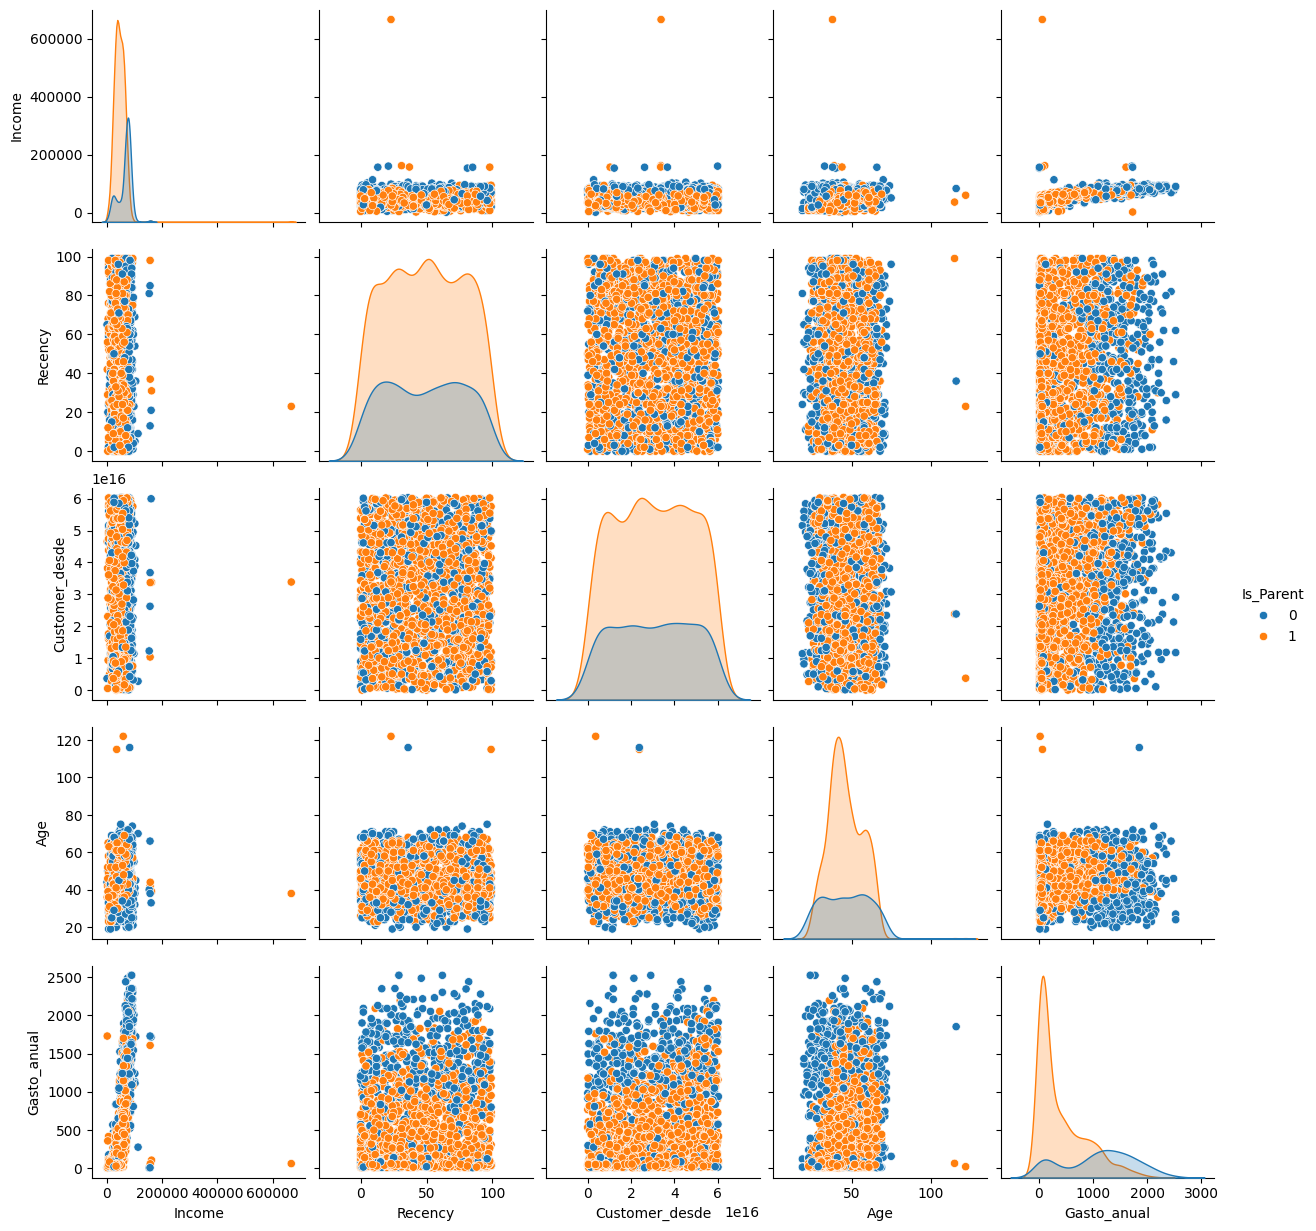

In [ ]:
plt.figure(figsize=(12, 8))
sns.pairplot(data=df_plot1, hue = 'Is_Parent')
plt.show()


Pode-se observar que na coluna de rendimento anual temos valores fora da curva, conhecidos como _Outliers_.

In [ ]:
#Removendo outliers identificados em idade e renda.
df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]
print("O total de outliers removidos:", len(df))

O total de outliers removidos: 2212


## Pré-processamento de dados


In [ ]:
print(df.dtypes)

Education               object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
Wine                     int64
Fruits                   int64
Meat                     int64
Fish                     int64
Sweets                   int64
Gold                     int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
Age                      int64
Gasto_anual              int64
Living_With             object
Children                 int64
Family_Size              int64
Is_Parent                int64
Customer_desde           int64
dtype: object


Note que na coluna "Education" e "Living_with", temos ainda dados categóricos.
Vamos fazer a conversão para utilizar um Encoder.

In [ ]:
#Transformando para dados numéricos.
object_cols = ['Education', 'Living_With']
le = LabelEncoder()
for i in object_cols:
  df[i] = df[[i]].apply(le.fit_transform)

In [ ]:
df2 = df.copy()

cols_del = ['AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2']
df2 = df2.drop(cols_del, axis = 1)


In [ ]:
#Aplicando Scaler
scaler = StandardScaler()
scaler.fit(df2)
scaled_ds = pd.DataFrame(scaler.transform(df2), columns = df2.columns)
print("O StandardScaler foi aplicado em todas as colunas.")

O StandardScaler foi aplicado em todas as colunas.


## Aplicando Redução de dimensionalidade com UMAP
UMAP = Unidimensional Manifold Approximation and projection.


In [ ]:
scaled_ds.head()

,Education,Income,Kidhome,Teenhome,Recency,Wine,Fruits,Meat,Fish,Sweets,...,NumWebVisitsMonth,Complain,Response,Age,Gasto_anual,Living_With,Children,Family_Size,Is_Parent,Customer_desde
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,0.692181,-0.09552,2.375425,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139,1.527721
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.132545,-0.09552,-0.420977,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456,-1.189011
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.544908,-0.09552,-0.420977,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139,-0.206048
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,0.279818,-0.09552,-0.420977,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456,-1.060584
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,-0.132545,-0.09552,-0.420977,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456,-0.951915


In [ ]:
from sklearn.decomposition import PCA


In [ ]:
pca = PCA(n_components =3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns = ["col1", "col2", "col3"])
PCA_ds.head()

,col1,col2,col3
0,5.188853,-0.220187,3.039225
1,-2.900989,0.028256,-1.260724
2,2.567807,-0.710758,-0.551206
3,-2.680034,-1.451834,-0.435085
4,-0.694726,0.191442,-0.522366


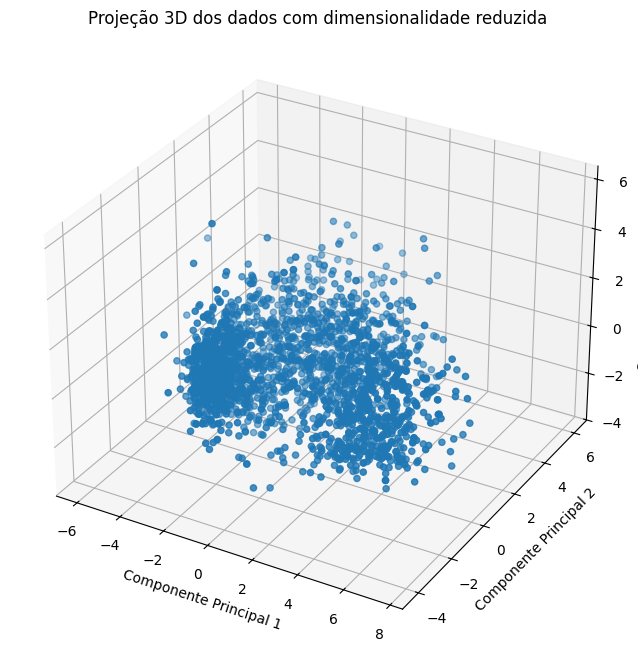

In [ ]:
# Os dados
x = PCA_ds["col1"]
y = PCA_ds["col2"]
z = PCA_ds["col3"]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(x, y, z, marker="o")
ax.set_title("Projeção 3D dos dados com dimensionalidade reduzida")
ax.set_xlabel("Componente Principal 1")
ax.set_ylabel("Componente Principal 2")
ax.set_zlabel("Componente Principal 3")
plt.show()

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

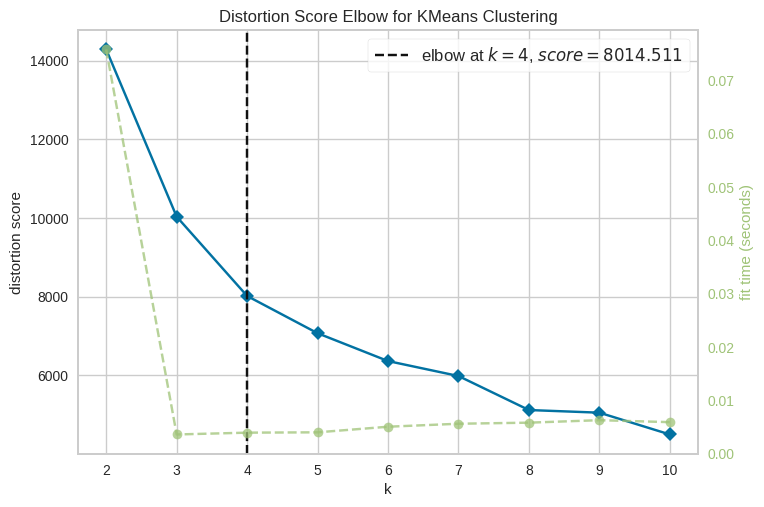

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:

#Encontrando o melhor número de clusters com o método cotovelo.
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()